In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
import tools
import cftime

from datetime import datetime
import pytz

# Hydrographs 

In [2]:
df = pd.read_excel('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_7/serie_de_tiempo.xlsx')

In [3]:
df.index=df.Date
df = df.drop(columns=['Date'])
df = df.drop(columns=['Number'])
df

,Gauge_1,Gauge_2
Date,,
2001-01-01,1620.82,38.0789
2001-01-02,1815.69,33.2094
2001-01-03,1900.21,105.4430
2001-01-04,2111.16,99.5168
2001-01-05,2389.94,253.8650
...,...,...
2003-12-27,2142.84,219.6160
2003-12-28,2115.18,190.7650
2003-12-29,2592.39,167.1940


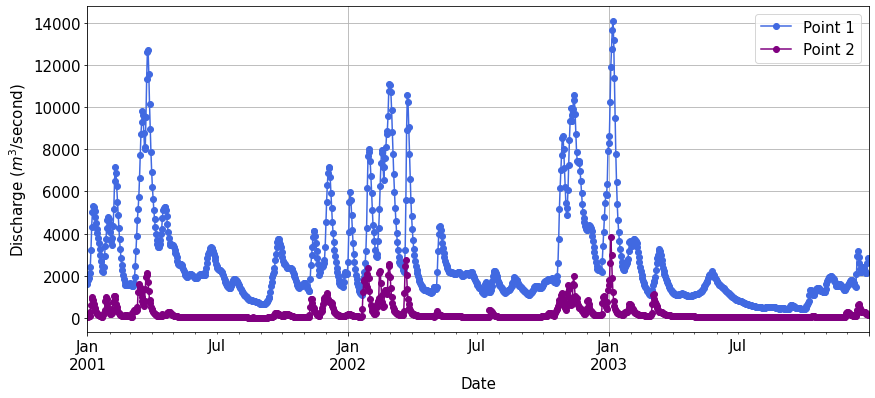

In [4]:
# Plotting precipitation per year
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust the size as needed
df.plot(ax=ax, kind='line', title='', ylabel='Discharge ($m^{3}$/second)', xlabel='Date', marker='o', grid=True, color=['royalblue', 'purple'])
ax.tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax.xaxis.label.set_size(15)  # X-axis label size
ax.yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax.legend(['Point 1', 'Point 2'], loc='upper right', fontsize=15)  # Adjust the fontsize parameter

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_7/Hidrograph', dpi = 300)

# Show the plot
plt.show()

# Average of annual average Runoff

In [5]:
ds = xr.open_dataset("/Users/mendezjf/Documents/GitHub/CWatM/Tutorials/01_Turn-ON/output/runoff_monthavg.nc", decode_times=False)
#units, reference_date = ds.time.attrs['units'].split('since')
#ds['time'] = pd.date_range(start=reference_date, periods=ds.sizes['time'], freq='MS')

In [6]:
ds

<xarray.Dataset>
Dimensions:          (lon: 14, lat: 12, time: 37)
Coordinates:
  * lon              (lon) float64 5.25 5.75 6.25 6.75 ... 10.75 11.25 11.75
  * lat              (lat) float64 51.75 51.25 50.75 50.25 ... 47.25 46.75 46.25
  * time             (time) float64 1.199e+03 1.2e+03 ... 1.234e+03 1.235e+03
Data variables:
    runoff_monthavg  (time, lat, lon) float32 ...
Attributes:
    settingsfile:     /Users/mendezjf/Documents/GitHub/CWatM/Tutorials/01_Tur...
    run_created:      Thu Mar  7 18:10:26 2024
    Source_Software:  CWATM Python: /Users/mendezjf/Documents/GitHub/CWatM/cw...
    Platform:         Darwin
    Version:          1.5: List_all_variables.py 2024/03/06 15:06
    institution:      IIASA
    title:            Rhine Water Model - WATCH WDFEI
    source:           CWATM output maps
    Conventions:      CF-1.6
    description:      
    author:           IIASA WAT

In [7]:
print(f'Data goes from {ds.time.min().item()} to {ds.time.max().item()} ')

Data goes from 1199.0 to 1235.0 


In [8]:
runoff = np.mean(ds['runoff_monthavg'].sel(time=slice('1199', '1235')), axis=0).data
latitudes = np.mean(ds['runoff_monthavg'].sel(time=slice('1199', '1235')), axis=0).lat.data
longitudes = np.mean(ds['runoff_monthavg'].sel(time=slice('1199', '1235')), axis=0).lon.data

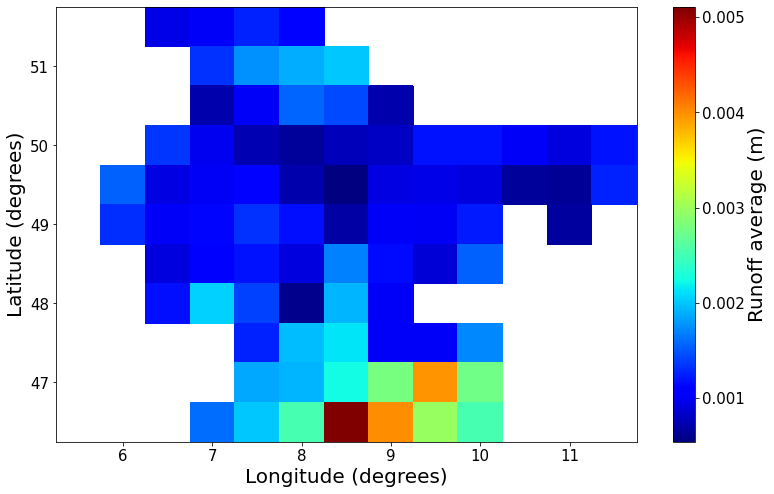

In [9]:
# Calculate the mean - ssp119
plt.figure(figsize=(13,8))
plot = plt.pcolormesh(longitudes,latitudes,runoff,cmap = "jet")
cbar = plt.colorbar(plot)
cbar.set_label('Runoff average (m)', fontsize=20)
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Longitude (degrees)', fontsize = 20)
plt.ylabel('Latitude (degrees)', fontsize = 20)

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_7/Runoff', dpi = 300)

# Show the plot
plt.show()

# Average of annual average total ET (m)

In [10]:
ds = xr.open_dataset("/Users/mendezjf/Documents/GitHub/CWatM/Tutorials/01_Turn-ON/output/totalET_monthavg.nc", decode_times=False)
#units, reference_date = ds.time.attrs['units'].split('since')
#ds['time'] = pd.date_range(start=reference_date, periods=ds.sizes['time'], freq='MS')

In [11]:
ds

<xarray.Dataset>
Dimensions:           (lon: 14, lat: 12, time: 37)
Coordinates:
  * lon               (lon) float64 5.25 5.75 6.25 6.75 ... 10.75 11.25 11.75
  * lat               (lat) float64 51.75 51.25 50.75 ... 47.25 46.75 46.25
  * time              (time) float64 1.199e+03 1.2e+03 ... 1.234e+03 1.235e+03
Data variables:
    totalET_monthavg  (time, lat, lon) float32 ...
Attributes:
    settingsfile:     /Users/mendezjf/Documents/GitHub/CWatM/Tutorials/01_Tur...
    run_created:      Thu Mar  7 18:10:26 2024
    Source_Software:  CWATM Python: /Users/mendezjf/Documents/GitHub/CWatM/cw...
    Platform:         Darwin
    Version:          1.5: List_all_variables.py 2024/03/06 15:06
    institution:      IIASA
    title:            Rhine Water Model - WATCH WDFEI
    source:           CWATM output maps
    Conventions:      CF-1.6
    description:      Total evapotranspiration for each cell including all la...
    author:           IIASA WAT

In [12]:
print(f'Data goes from {ds.time.min().item()} to {ds.time.max().item()} ')

Data goes from 1199.0 to 1235.0 


In [13]:
data_historical_185001 = np.mean(ds['totalET_monthavg'].sel(time=slice('1199', '1235')), axis=0).data
latitudes = np.mean(ds['totalET_monthavg'].sel(time=slice('1199', '1235')), axis=0).lat.data
longitudes = np.mean(ds['totalET_monthavg'].sel(time=slice('1199', '1235')), axis=0).lon.data

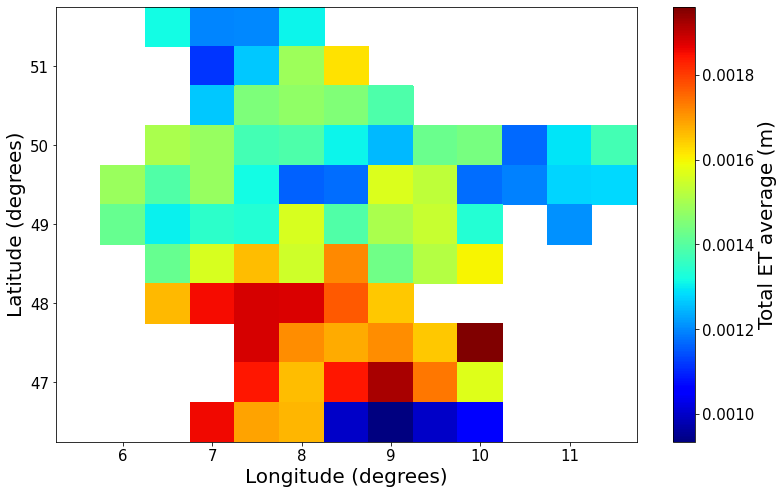

In [14]:
# Calculate the mean - ssp119
plt.figure(figsize=(13,8))
plot = plt.pcolormesh(longitudes,latitudes,data_historical_185001,cmap = "jet")
cbar = plt.colorbar(plot)
cbar.set_label('Total ET average (m)', fontsize=20)
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Longitude (degrees)', fontsize = 20)
plt.ylabel('Latitude (degrees)', fontsize = 20)

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_7/Total_ET', dpi = 300)

# Show the plot
plt.show()

# Water balance (P - ET - Q = 0)

In [35]:
extraction_total_ET = np.mean(ds['totalET_monthavg'].sel( lon=('9'), lat=('47'), method="nearest", tolerance=5), axis=0).data
ET = np.nanmean(extraction_total_ET)
ET

0.001701565